<a href="https://colab.research.google.com/github/smhasandanish/codsoft-datasci-internship/blob/main/codsoft_taskno_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving tested.csv to tested.csv


In [ ]:
df = pd.read_csv('tested.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Example data preprocessing steps
df.dropna(subset=['Age'], inplace=True)  # Remove rows with missing Age
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode gender as binary


In [ ]:
X = df[['Age', 'Sex', 'Pclass', 'Fare']]
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can use 'median' or other strategies
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [ ]:
df.dropna(subset=['Age', 'Sex', 'Pclass', 'Fare'], inplace=True)
X = df[['Age', 'Sex', 'Pclass', 'Fare']]
y = df['Survived']


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        25

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



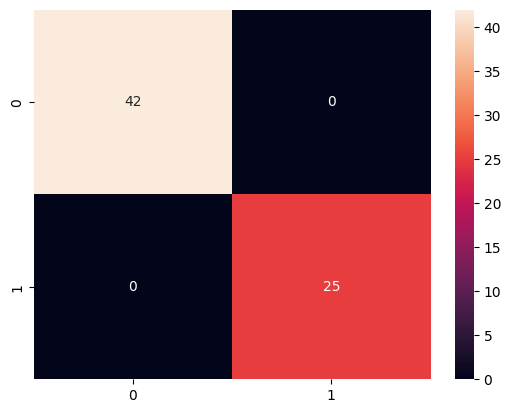

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
confusion_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Sample new data (features) for prediction
new_passenger_data = [[25, 0, 3, 50.0],  # Example passenger 1
                      [32, 1, 1, 100.0],  # Example passenger 2
                      [18, 0, 2, 30.0]]  # Example passenger 3

# Make predictions on the new data
predictions = model.predict(new_passenger_data)

# Display the predictions
for i, prediction in enumerate(predictions):
    if prediction == 1:
        print(f"Passenger {i + 1}: Survived")
    else:
        print(f"Passenger {i + 1}: Did not survive")


Passenger 1: Did not survive
Passenger 2: Survived
Passenger 3: Did not survive
